# **Extracción del Archivo Tratado**

Csv Extraido de la primera parte del challenge

In [ ]:
import pandas as pd
datos=pd.read_csv("/content/datos_clientes.csv")

# Eliminación de Columnas Irrelevantes

Eliminamos columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   Retirado          7043 non-null   object 
 3   gender            7043 non-null   object 
 4   SeniorCitizen     7043 non-null   int64  
 5   Partner           7043 non-null   object 
 6   Dependents        7043 non-null   object 
 7   tenure            7043 non-null   int64  
 8   PhoneService      7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


In [ ]:
datos.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retirado          7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
datos=datos.rename(columns={'Retirado':'Churn'})

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
col = "Churn"
datos = datos[[c for c in datos.columns if c != col] + [col]]

# **Revisión de Nulos**

In [ ]:
datos.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# Encoding

Transformamos las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning

In [ ]:
datos_1=datos.copy()

In [ ]:
categorical_cols = datos_1.select_dtypes(include=["object", "category"]).columns.tolist()
datos_1_encoded=pd.get_dummies(datos_1,columns=categorical_cols,drop_first=True)

In [ ]:
datos_1_encoded.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,9,65.6,593.30,2.187,False,True,True,True,False,...,True,False,False,True,False,True,False,False,True,False
1,0,9,59.9,542.40,1.997,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,0,4,73.9,280.85,2.463,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
3,1,13,98.0,1237.85,3.267,True,True,False,True,False,...,True,False,True,False,False,True,False,True,False,True
4,1,3,83.9,267.40,2.797,False,True,False,True,False,...,True,False,False,False,False,True,False,False,True,True


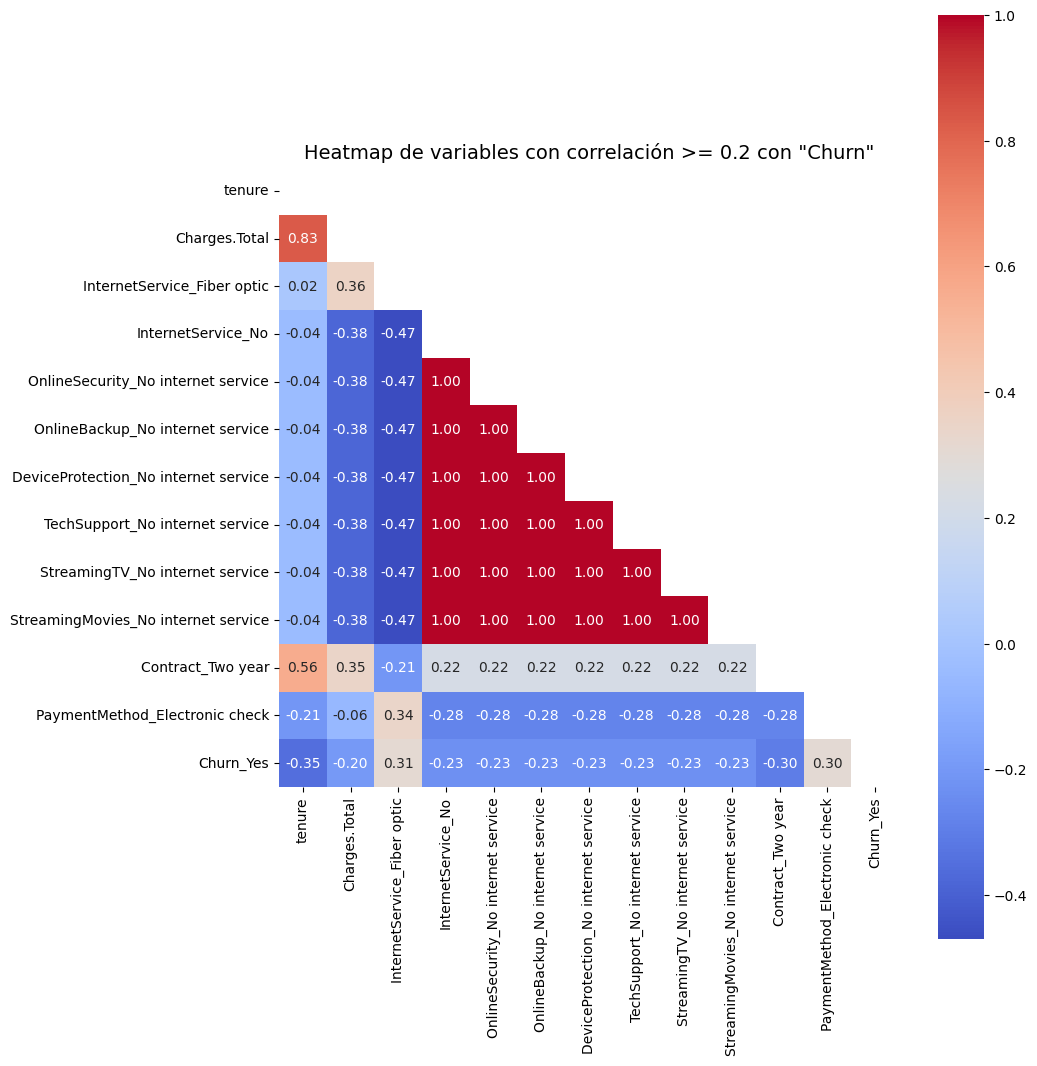

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

datos_1_corr=datos_1_encoded.corr().round(2)


churn_corr = datos_1_corr["Churn_Yes"].abs()
relevant_features = churn_corr[churn_corr >= 0.2].index
datos_corr_filtered = datos_1_corr.loc[relevant_features, relevant_features]

mask = np.triu(np.ones_like(datos_corr_filtered, dtype=bool))

plt.figure(figsize=(10,12))
sns.heatmap(datos_corr_filtered,
            mask=mask,
            cmap="coolwarm",
            annot=True,
            square=True,
            fmt=".2f",
            cbar=True)

plt.title('Heatmap de variables con correlación >= 0.2 con "Churn"', fontsize=14)
plt.show()


Nos damos cuenta de la alta tasa de colinealidad entre las variasbles de servicios, por lo que debemos transformar o tratar esas columnas para reducir esa tasa.


---



En este caso, convertiremos los valores "No internet service" de estas variables al valor: "No".

In [ ]:
datos_clean=datos.copy()

In [ ]:
#Columnas de servicios con alta tasa de colinealidad
cols=['OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']
for i in cols:
  datos_clean[i]=datos_clean[i].replace('No internet service','No')

In [ ]:
datos_clean["InternetService"] = pd.Categorical(
    datos_clean["InternetService"],
    categories=["No", "DSL", "Fiber optic"]
)

In [ ]:
datos_encoded2 = pd.get_dummies(datos_clean, columns=["InternetService"], drop_first=True)

In [ ]:
categorical_cols = datos_encoded2.select_dtypes(include=["object", "category"]).columns.tolist()
datos_encoded=pd.get_dummies(datos_encoded2,columns=categorical_cols,drop_first=True)

In [ ]:
datos_encoded.columns


Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias', 'InternetService_DSL', 'InternetService_Fiber optic',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

# Verificación de la Proporción de Cancelación (Churn)

Calculamos la proporción de clientes que cancelaron en relación con los que permanecieron activos. Con el fin de evaluar si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [ ]:
datos_encoded['Churn_Yes'].value_counts()

,count
Churn_Yes,
False,5174
True,1869


In [ ]:
datos_encoded['Churn_Yes'].value_counts(normalize=True)*100

,proportion
Churn_Yes,
False,73.463013
True,26.536987


# **Análisis de Correlación**

Visualizamos la matriz de correlación para identificar relaciones entre las variables numéricas.

In [ ]:
datos_corr=datos_encoded.corr().round(2)
datos_corr

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,InternetService_DSL,InternetService_Fiber optic,gender_Male,Partner_Yes,Dependents_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
SeniorCitizen,1.00,0.02,0.22,0.10,0.22,-0.11,0.26,-0.00,0.02,-0.21,...,-0.06,0.11,0.12,-0.05,-0.12,0.16,-0.02,0.17,-0.15,0.15
tenure,0.02,1.00,0.25,0.83,0.25,0.01,0.02,0.01,0.38,0.16,...,0.32,0.28,0.29,0.20,0.56,0.01,0.23,-0.21,-0.23,-0.35
Charges.Monthly,0.22,0.25,1.00,0.65,1.00,-0.16,0.79,-0.01,0.10,-0.11,...,0.34,0.63,0.63,0.00,-0.07,0.35,0.03,0.27,-0.38,0.19
Charges.Total,0.10,0.83,0.65,1.00,0.65,-0.05,0.36,-0.00,0.32,0.06,...,0.43,0.51,0.52,0.17,0.35,0.16,0.18,-0.06,-0.30,-0.20
Cuentas_Diarias,0.22,0.25,1.00,0.65,1.00,-0.16,0.79,-0.01,0.10,-0.11,...,0.34,0.63,0.63,0.00,-0.07,0.35,0.03,0.27,-0.38,0.19
InternetService_DSL,-0.11,0.01,-0.16,-0.05,-0.16,1.00,-0.64,0.01,-0.00,0.05,...,0.31,0.02,0.03,0.05,0.03,-0.06,0.05,-0.10,0.04,-0.12
InternetService_Fiber optic,0.26,0.02,0.79,0.36,0.79,-0.64,1.00,-0.01,0.00,-0.17,...,-0.02,0.33,0.32,-0.08,-0.21,0.33,-0.05,0.34,-0.31,0.31
gender_Male,-0.00,0.01,-0.01,-0.00,-0.01,0.01,-0.01,1.00,-0.00,0.01,...,-0.01,-0.01,-0.01,0.01,-0.00,-0.01,0.00,0.00,0.01,-0.01
Partner_Yes,0.02,0.38,0.10,0.32,0.10,-0.00,0.00,-0.00,1.00,0.45,...,0.12,0.12,0.12,0.08,0.25,-0.01,0.08,-0.08,-0.10,-0.15
Dependents_Yes,-0.21,0.16,-0.11,0.06,-0.11,0.05,-0.17,0.01,0.45,1.00,...,0.06,-0.02,-0.04,0.07,0.20,-0.11,0.06,-0.15,0.06,-0.16


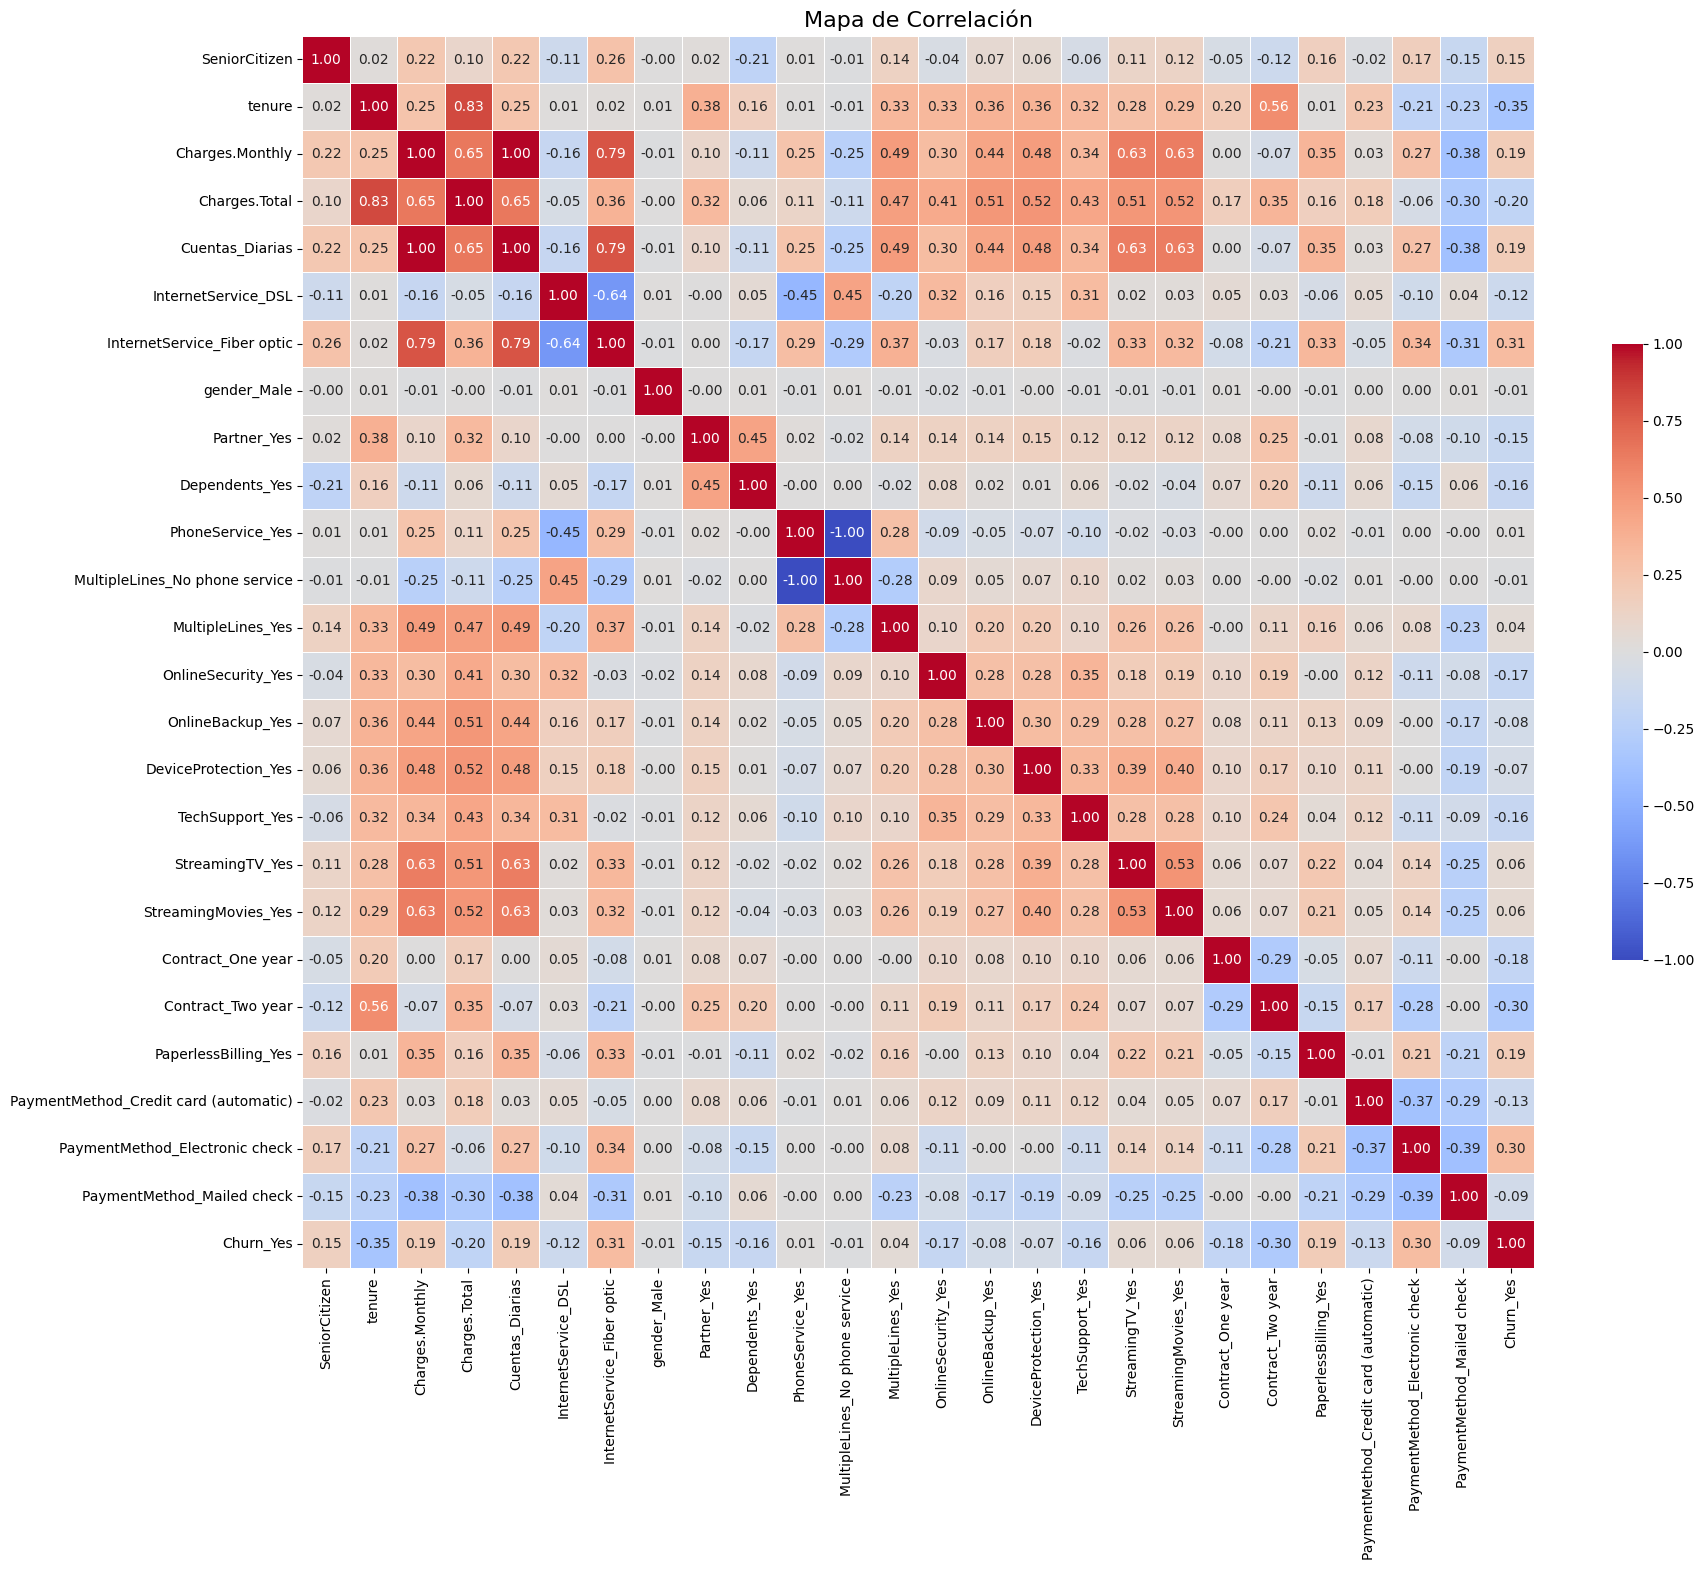

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,16))
sns.heatmap(datos_corr,
            cmap="coolwarm",
            annot=True,
            square=True,
            fmt=".2f",  # 2 decimales
            cbar=True,
            linewidths=.5, cbar_kws={"shrink":.5},
            center=0)

plt.title("Mapa de Correlación", fontsize=16)
plt.show()

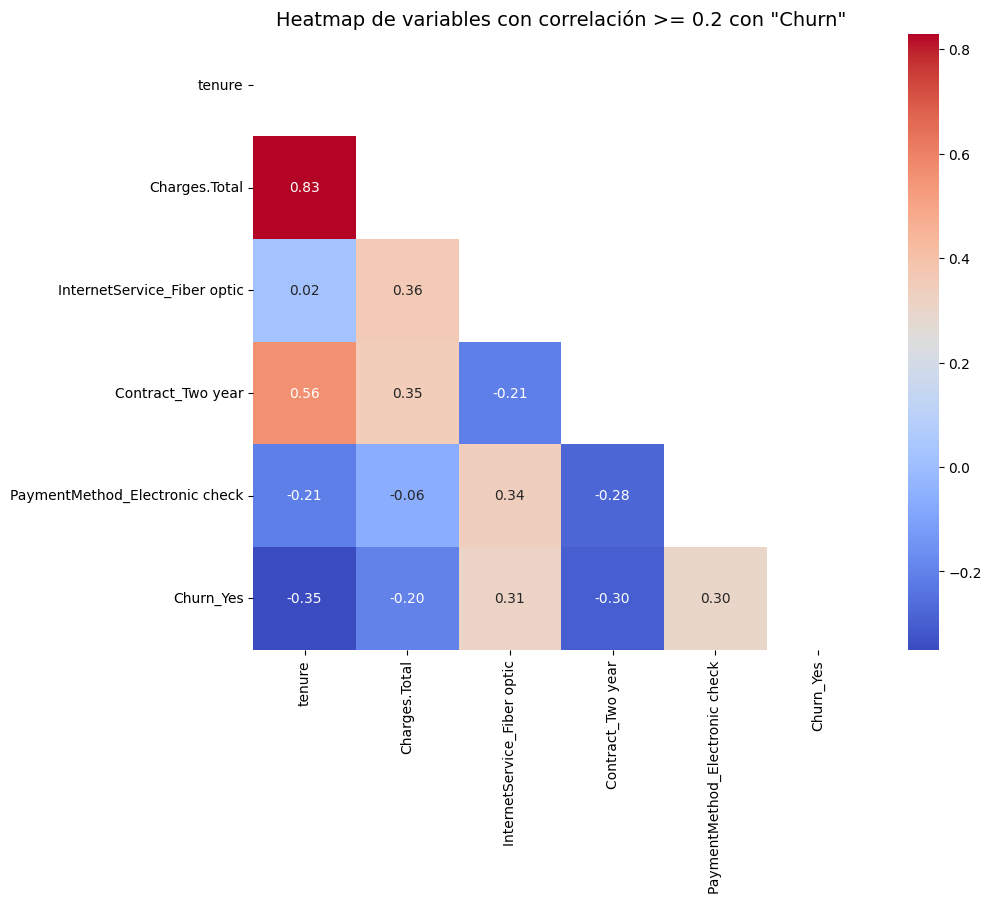

In [ ]:

churn_corr = datos_corr["Churn_Yes"].abs()
relevant_features = churn_corr[churn_corr >= 0.2].index
datos_corr_filtered = datos_corr.loc[relevant_features, relevant_features]


mask = np.triu(np.ones_like(datos_corr_filtered, dtype=bool))


plt.figure(figsize=(10,8))
sns.heatmap(datos_corr_filtered,
            mask=mask,
            cmap="coolwarm",
            annot=True,
            square=True,
            fmt=".2f",
            cbar=True)

plt.title('Heatmap de variables con correlación >= 0.2 con "Churn"', fontsize=14)
plt.show()


Conseguimos una tasa colinealidad mas baja 😀

# Análisis Dirigido

Revisamos cómo algunas variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

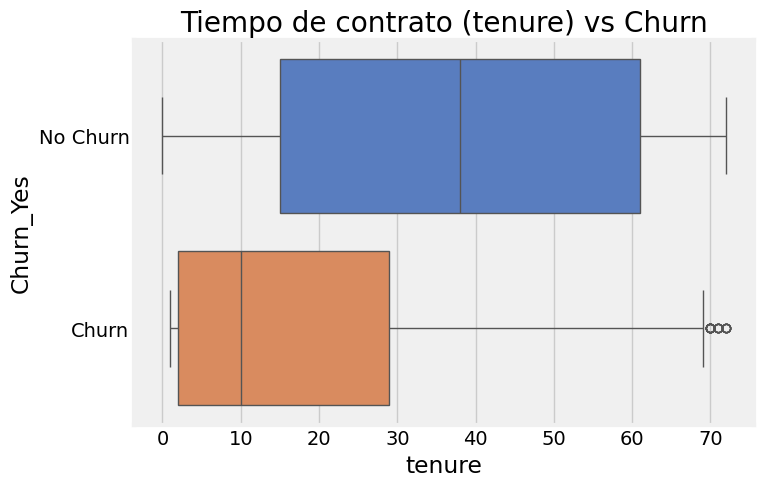

In [ ]:
#Tenure vs Churn
plt.figure(figsize=(8,5))
with plt.style.context('fivethirtyeight'):
  sns.set_palette("muted")
  sns.boxplot(y="Churn_Yes", x="tenure",hue="Churn_Yes" ,data=datos_encoded,orient="h",legend=False)
  plt.yticks([0,1], ["No Churn","Churn"])  # etiquetas más claras
  plt.title("Tiempo de contrato (tenure) vs Churn")
  plt.show()


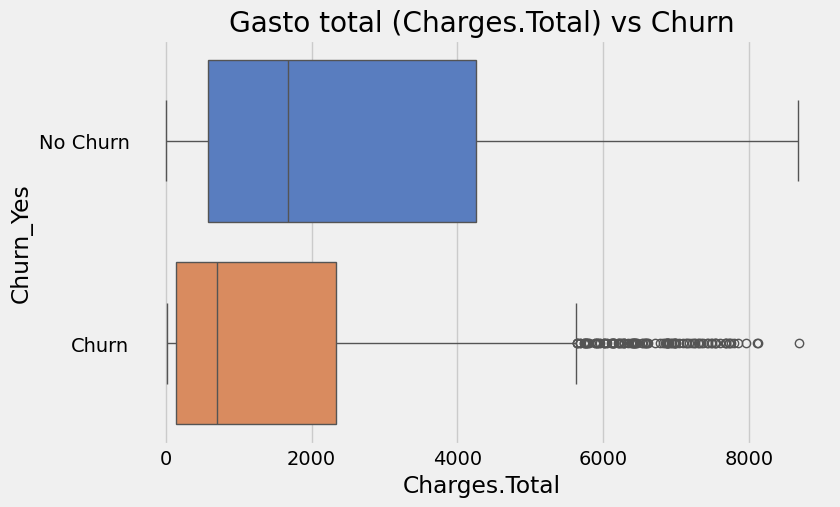

In [ ]:
# Gasto total vs Churn
with plt.style.context('fivethirtyeight'):
  sns.set_palette("muted")
  plt.figure(figsize=(8,5))
  sns.boxplot(y="Churn_Yes", x="Charges.Total",hue="Churn_Yes" , data=datos_encoded,orient="h",legend=False)
  plt.yticks([0,1], ["No Churn","Churn"])
  plt.title("Gasto total (Charges.Total) vs Churn")
  plt.show()

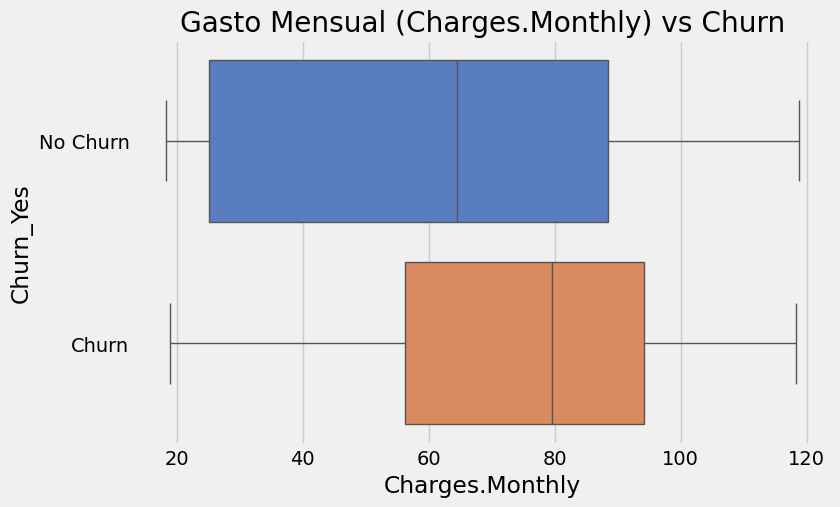

In [ ]:
with plt.style.context('fivethirtyeight'):
  sns.set_palette("muted")
  plt.figure(figsize=(8,5))
  sns.boxplot(y="Churn_Yes", x="Charges.Monthly",hue="Churn_Yes" , data=datos_encoded,orient="h",legend=False)
  plt.yticks([0,1], ["No Churn","Churn"])
  plt.title("Gasto Mensual (Charges.Monthly) vs Churn")
  plt.show()

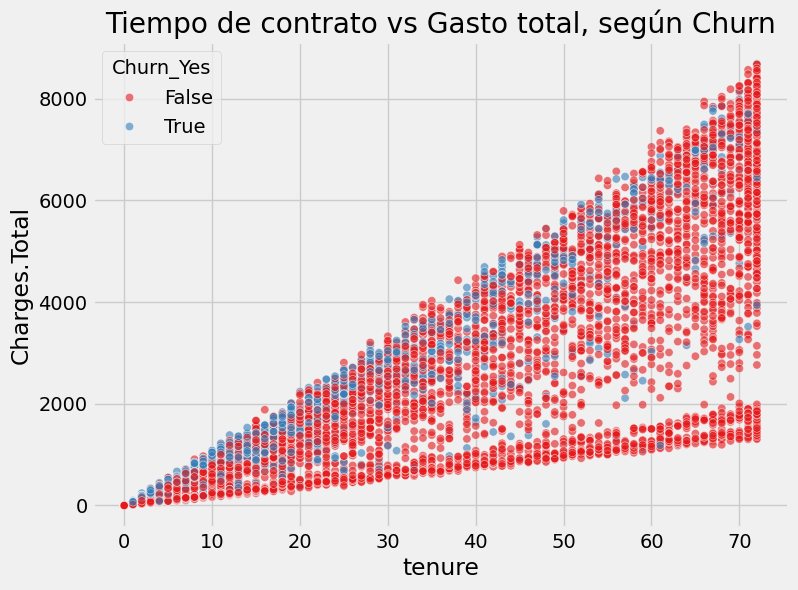

In [ ]:
# Scatter plot: Tiempo de contrato vs Gasto total, coloreado por Churn
with plt.style.context('fivethirtyeight'):
  sns.set_palette("muted")
  plt.figure(figsize=(8,6))
  sns.scatterplot(x="tenure", y="Charges.Total", hue="Churn_Yes", data=datos_encoded, alpha=0.6, palette="Set1")
  plt.title("Tiempo de contrato vs Gasto total, según Churn")
  plt.show()

# Análisis de multicolinearidad

In [ ]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [ ]:
X=datos_encoded.drop(columns=['Churn_Yes'])
X_const=add_constant(X)

In [ ]:
X_const=X_const.astype(float)
vif_data=pd.DataFrame()
vif_data["feature"]=X_const.columns
vif_data["VIF"]=[variance_inflation_factor(X_const.values,i) for i in range(X_const.shape[1])]
display(vif_data.sort_values(by="VIF",ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
12,MultipleLines_No phone service,inf
11,PhoneService_Yes,inf
5,Cuentas_Diarias,1.348560e+07
3,Charges.Monthly,1.348494e+07
7,InternetService_Fiber optic,5.912472e+02
6,InternetService_DSL,1.385285e+02
19,StreamingMovies_Yes,2.411071e+01
18,StreamingTV_Yes,2.405800e+01
4,Charges.Total,1.079434e+01
2,tenure,7.527450e+00


In [ ]:
X_const

,const,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,InternetService_DSL,InternetService_Fiber optic,gender_Male,Partner_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,9.0,65.60,593.30,2.187,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,9.0,59.90,542.40,1.997,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,4.0,73.90,280.85,2.463,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,13.0,98.00,1237.85,3.267,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,1.0,3.0,83.90,267.40,2.797,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,13.0,55.15,742.90,1.838,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,1.0,0.0,22.0,85.10,1873.70,2.837,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7040,1.0,0.0,2.0,50.30,92.75,1.677,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7041,1.0,0.0,67.0,67.85,4627.65,2.262,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:

X_filtered = X_const.copy()

columnas_inf= ["PhoneService_Yes","MultipleLines_No phone service"]

X_filtered.drop(columns=columnas_inf, inplace=True)

X_filtered.drop(columns=["Cuentas_Diarias"], inplace=True)


X_filtered = X_filtered.astype (float)


vif_data = pd.DataFrame()
vif_data["feature"]=X_filtered.columns
vif_data["VIF"]=[variance_inflation_factor(X_filtered.values,i) for i in range(X_filtered.shape[1])]
display(vif_data.sort_values(by="VIF",ascending=False))

,feature,VIF
0,const,38.475664
3,Charges.Monthly,35.317543
6,InternetService_Fiber optic,26.523247
4,Charges.Total,10.793154
2,tenure,7.527184
5,InternetService_DSL,6.454193
18,Contract_Two year,2.632077
15,StreamingTV_Yes,2.451816
16,StreamingMovies_Yes,2.435929
21,PaymentMethod_Electronic check,1.976144


In [ ]:
X_filtered.drop(columns=['InternetService_Fiber optic','Charges.Total'],inplace=True)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"]=X_filtered.columns
vif_data["VIF"]=[variance_inflation_factor(X_filtered.values,i) for i in range(X_filtered.shape[1])]
display(vif_data.sort_values(by="VIF",ascending=False))

,feature,VIF
0,const,23.517192
3,Charges.Monthly,5.195823
2,tenure,2.779741
16,Contract_Two year,2.561484
19,PaymentMethod_Electronic check,1.963654
13,StreamingTV_Yes,1.888121
14,StreamingMovies_Yes,1.887203
20,PaymentMethod_Mailed check,1.834539
4,InternetService_DSL,1.673103
15,Contract_One year,1.598015


In [ ]:
X_filtered.columns

Index(['const', 'SeniorCitizen', 'tenure', 'Charges.Monthly',
       'InternetService_DSL', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
datos_encoded['Churn_Yes'].sample(40)

,Churn_Yes
4197,False
4781,False
3798,False
4168,False
6196,False
3465,True
3774,False
2517,True
4652,False
2440,False


# **Modelos Predictivos**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Creamos tanto las variables de entrenamiento y prueba como la baseline y evaluamos con este modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report


y = datos_encoded["Churn_Yes"].astype(int)
X = X_filtered.copy()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=5
)

# Modelo baseline
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=5)
dummy_clf.fit(X_train, y_train)


y_pred = dummy_clf.predict(X_test)

# Evaluación
print("Accuracy (Dummy Baseline):", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy (Dummy Baseline): 0.73450070989115

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



## Entrenamos 4 modelos:


- Regresión Logística (requiere estandarización)

- KNN (requiere estandarización)

- Árbol de Decisión

- Random Forest







In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = X_filtered.copy()
y = datos_encoded['Churn_Yes']

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=5)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=5)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Arbol
dt = DecisionTreeClassifier(max_depth=5, random_state=5)  # max_depth para evitar overfitting
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=5)

In [ ]:
#RandomForest
rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=5)

# **Evaluación de los modelos**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(modelo, X_test, y_test, nombre_modelo="Modelo"):
    # Hacemos predicciones
    y_pred = modelo.predict(X_test)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Imprimir resultados
    print(f"\n Resultados de {nombre_modelo}:")
    print(f"   - Accuracy  : {accuracy:.4f}")
    print(f"   - Precision : {precision:.4f}")
    print(f"   - Recall    : {recall:.4f}")
    print(f"   - F1-score  : {f1:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de confusión - {nombre_modelo}")
    plt.show()

    return

## Regresión Logística:


 Resultados de Regresión Logística:
   - Accuracy  : 0.8041
   - Precision : 0.6690
   - Recall    : 0.5187
   - F1-score  : 0.5843


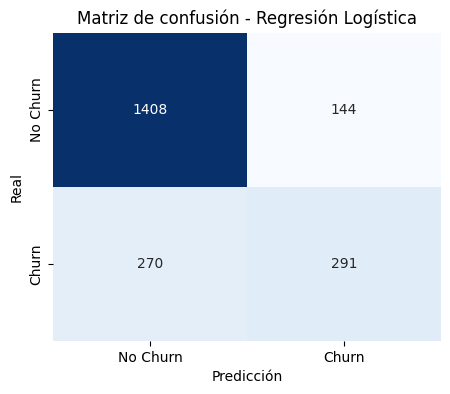

In [ ]:
evaluar_modelo(log_reg, X_test_scaled, y_test, "Regresión Logística")

## KNN


 Resultados de KNN:
   - Accuracy  : 0.7619
   - Precision : 0.5592
   - Recall    : 0.4884
   - F1-score  : 0.5214


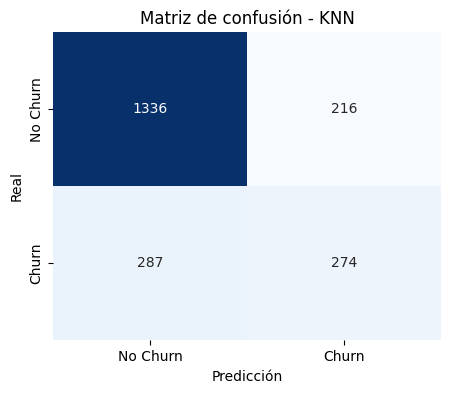

In [ ]:
evaluar_modelo(knn, X_test_scaled, y_test, "KNN")

## **Arbol**


 Resultados de Árbol de Decisión:
   - Accuracy  : 0.7965
   - Precision : 0.6479
   - Recall    : 0.5116
   - F1-score  : 0.5717


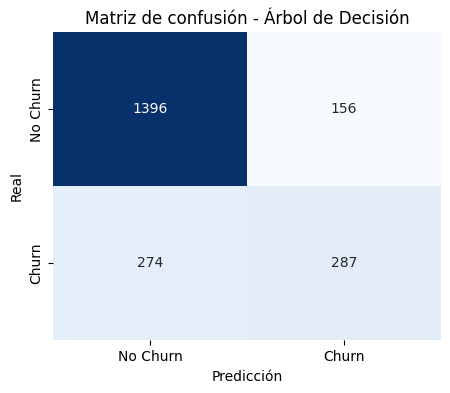

In [ ]:
evaluar_modelo(dt, X_test, y_test, "Árbol de Decisión")

## **Random Forest**


 Resultados de Random Forest:
   - Accuracy  : 0.8003
   - Precision : 0.7062
   - Recall    : 0.4242
   - F1-score  : 0.5301


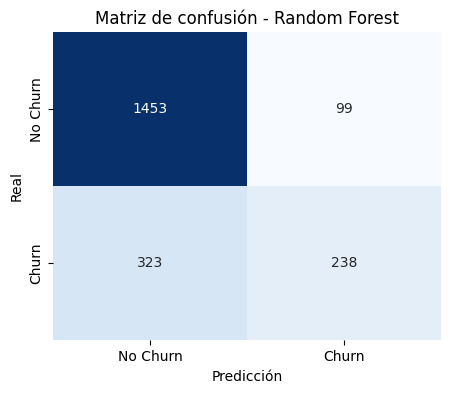

In [ ]:
evaluar_modelo(rf, X_test, y_test, "Random Forest")

## **Análisis y comparación (hasta el momento)**

In [ ]:
resultados = {
    "Modelo": ["Regresión Logística", "KNN", "Árbol de Decisión", "Random Forest"],
    "Accuracy": [0.8178, 0.7690, 0.7941, 0.8088],
    "Precision": [0.6872, 0.5723, 0.6382, 0.7071],
    "Recall": [0.5758, 0.5152, 0.5187, 0.4777],
    "F1-score": [0.6266, 0.5422, 0.5723, 0.5702]
}
tabla_resultados = pd.DataFrame(resultados)

print(tabla_resultados)

                Modelo  Accuracy  Precision  Recall  F1-score
0  Regresión Logística    0.8178     0.6872  0.5758    0.6266
1                  KNN    0.7690     0.5723  0.5152    0.5422
2    Árbol de Decisión    0.7941     0.6382  0.5187    0.5723
3        Random Forest    0.8088     0.7071  0.4777    0.5702


**KNN**

- Accuracy más baja (0.769).

- Precision (0.5723) y Recall (0.5152) son los más bajos, significa que se equivoca bastante tanto en identificar Churn como en diferenciar los No Churn.
- Bajos TP y muchos FN, significa que muchos Churn se le escapan.


**Árbol**

- Accuracy decente (0.7941).

- Buen nivel de precisión (0.6382), pero Recall bajo (0.5187).

- Esto sugiere que el árbol tiende a clasificar mejor a las No Churn (clase mayoritaria), pero deja escapar muchos Churn.

- Posible overfitting, y menos balanceado que la regresión logística.

- TP un poco mejor que KNN, pero sigue teniendo bastantes FN.

Modelo intermedio, mejor que KNN pero no supera a la regresión logística.  

**Regresión Logística**

- Mejor balance general: la Accuracy y el F1-score son los más altos.

- Recall de 0.575:logra identificar un poco más de cancelaciones que los demás modelos.

- No predice demasiados falsos positivos ni falsos negativos.  

Buen balance entre TP y TN.


Por el momento es el modelo más confiable y robusto



**Random Forest**

- Accuracy muy buena (0.8088).

- Mejor Precisión (0.7071) predice con alta seguridad el Churn

- Recall más bajo de todos (0.4777) lo que puede significa que pierde muchos clientes que realmente son Churn.
- Muy altos TN (predice bien No Churn).

- TP bajo (muchos FN).

- y con los FP mas bajos dada alta
No parece tener overfitting fuerte, porque los resultados son estables, pero sí un sesgo hacia los negativos.



Analizando posible over

0.8471651781612364
0.7876341492548284
0.835624092654869
0.8553272644577982


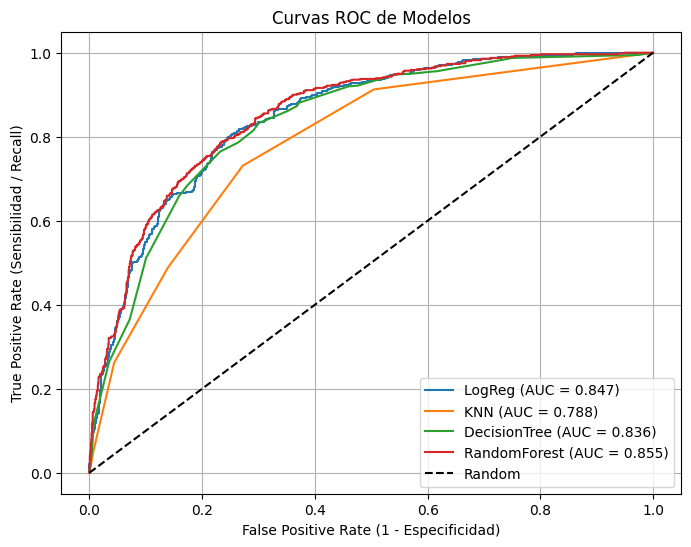

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(models, X_test, y_test, X_test_scaled=None):

    plt.figure(figsize=(8,6))

    for name, model in models.items():
        if name in ["LogReg", "KNN"] and X_test_scaled is not None:
            X_input = X_test_scaled
        else:
            X_input = X_test

        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_input)[:,1]
        else:
            y_prob = model.decision_function(X_input)

        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        print(auc)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")


    plt.plot([0,1], [0,1], "k--", label="Random")
    plt.xlabel("False Positive Rate (1 - Especificidad)")
    plt.ylabel("True Positive Rate (Sensibilidad / Recall)")
    plt.title("Curvas ROC de Modelos")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


models = {
    "LogReg": log_reg,
    "KNN": knn,
    "DecisionTree": dt,
    "RandomForest": rf
}

plot_roc(models, X_test, y_test, X_test_scaled=X_test_scaled)


## Si analizamos en busca de un posible overfitting/underfitting en los modelos

Tenemos que:
- Regresion lineal con un AUC = 0.847 parece tener un buen balance.
- KNN con un AUC = 0.788, probablemente presenta un underfitting, lo que sugiere que el modelo pierde la capacidad de generalizar a nuevos datos.
- Decision Tree (AUC = 0.836), puede tener un ligero riesgo de overfitting.
- Random Forest (AUC = 0.855),como el valor es alto y consistente con Logistic Regression, aquí parece que aprendió bien sin sobreajuste excesivo.



# **Balanceo**

                    Modelo  Accuracy  Precision    Recall  F1-score  \
0           LogReg (SMOTE)  0.765263   0.539586  0.789661  0.641100   
1              KNN (SMOTE)  0.704685   0.464487  0.734403  0.569061   
2     DecisionTree (SMOTE)  0.791292   0.634529  0.504456  0.562066   
3     RandomForest (SMOTE)  0.799811   0.609873  0.682709  0.644239   
4  DecisionTree (NearMiss)  0.758637   0.547135  0.527629  0.537205   
5  RandomForest (NearMiss)  0.780407   0.571852  0.688057  0.624595   
6  DecisionTree (SMOTEENN)  0.700426   0.464981  0.852050  0.601636   
7  RandomForest (SMOTEENN)  0.736867   0.502646  0.846702  0.630810   

                  ConfMatrix  
0  [[1174, 378], [118, 443]]  
1  [[1077, 475], [149, 412]]  
2  [[1389, 163], [278, 283]]  
3  [[1307, 245], [178, 383]]  
4  [[1307, 245], [265, 296]]  
5  [[1263, 289], [175, 386]]  
6   [[1002, 550], [83, 478]]  
7   [[1082, 470], [86, 475]]  


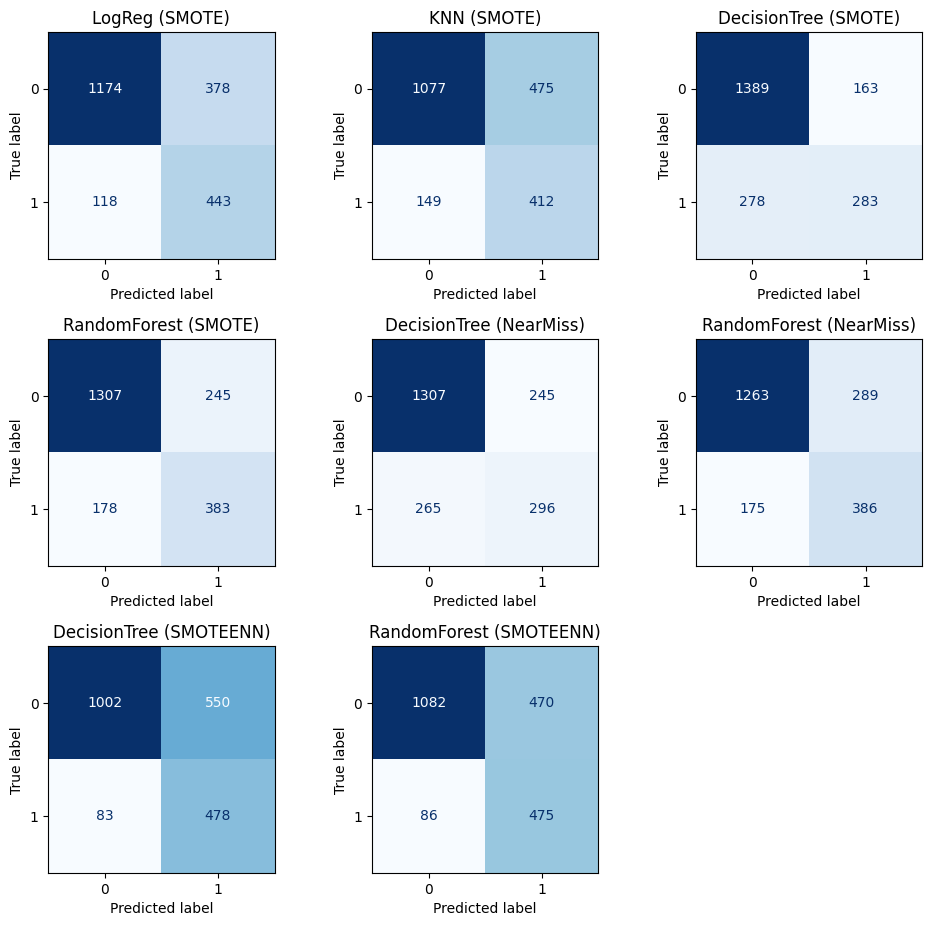

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler

def evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Reporte de métricas
    report = classification_report(y_test, y_pred, output_dict=True)
    acc = report["accuracy"]
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1 = report["1"]["f1-score"]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    return {
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ConfMatrix": cm
    }


resultados_finales = []

# Evaluar todos los pipelines
for nombre, modelo in pipelines_smote.items():
    res = evaluar_modelo(f"{nombre} (SMOTE)", modelo, X_train, y_train, X_test, y_test)
    resultados_finales.append(res)

for nombre, modelo in pipelines_nm.items():
    res = evaluar_modelo(f"{nombre} (NearMiss)", modelo, X_train, y_train, X_test, y_test)
    resultados_finales.append(res)

for nombre, modelo in pipelines_smoteenn.items():
    res = evaluar_modelo(f"{nombre} (SMOTEENN)", modelo, X_train, y_train, X_test, y_test)
    resultados_finales.append(res)

df_resultados = pd.DataFrame(resultados_finales)
print(df_resultados)


fig, axes = plt.subplots(4, 3, figsize=(10, 12))
axes = axes.flatten()

for i, res in enumerate(resultados_finales):
    cm = res["ConfMatrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap="Blues", colorbar=False)
    axes[i].set_title(res["Modelo"])

for i, res in enumerate(resultados_finales):
    if res["Modelo"] == "RandomForest (SMOTEENN)":
        rf_cm = res["ConfMatrix"]
        disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
        disp.plot(ax=axes[11], cmap="Blues", colorbar=False)
        axes[11].set_title("RandomForest (SMOTEENN)")

for j in range(len(resultados_finales), 12):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Con el balanceo tenemos que:

- En Accuracy → RandomForest (SMOTE) (0.8088).

- En Precision → DecisionTree (SMOTE) → 0.6345.

- En Recall → DecisionTree (SMOTEENN) → 0.8521

- En F1-score → RandomForest (SMOTE) → 0.6442


Dado que preferimos detectar la mayor cantidad posible de churners escogemos modelo Random Forest con SMOTEENN.



# Comprobando modelo Random Forest

In [ ]:
from sklearn.metrics import classification_report

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest SIN balanceo:")
print(classification_report(y_test, y_pred_rf, target_names=["No Churn","Churn"]))



Random Forest SIN balanceo:
              precision    recall  f1-score   support

    No Churn       0.82      0.94      0.87      1552
       Churn       0.71      0.42      0.53       561

    accuracy                           0.80      2113
   macro avg       0.76      0.68      0.70      2113
weighted avg       0.79      0.80      0.78      2113



In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline


pipeline_rf = imbpipeline([
    ('smoteenn', SMOTEENN()),
    ('rf', rf)
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf_bal = pipeline_rf.predict(X_test)

print("\nRandom Forest CON SMOTEENN:")
print(classification_report(y_test, y_pred_rf_bal, target_names=["No Churn","Churn"]))



Random Forest CON SMOTEENN:
              precision    recall  f1-score   support

    No Churn       0.94      0.68      0.79      1552
       Churn       0.49      0.87      0.63       561

    accuracy                           0.73      2113
   macro avg       0.72      0.78      0.71      2113
weighted avg       0.82      0.73      0.75      2113



Dado que sabemos que el Recall (Sensibilidad) representa el porcentaje de Churn detectados.

Podemos concluir que, puesto que, el Recall de Churn es mayor con SMOTEENN que sin él, el balanceo ha funcionado.

# Análisis de la Importancia de las Variables

In [ ]:
importances = modelo_rf_smoteenn.named_steps["model"].feature_importances_
features = X_train.columns


df_importancias = pd.DataFrame({
    "Variable": features,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

print(df_importancias.head(10))


                          Variable  Importancia
16               Contract_Two year     0.202382
3                  Charges.Monthly     0.156286
2                           tenure     0.132376
19  PaymentMethod_Electronic check     0.117095
17            PaperlessBilling_Yes     0.063274
15               Contract_One year     0.059913
9               OnlineSecurity_Yes     0.055315
12                 TechSupport_Yes     0.043441
6                      Partner_Yes     0.033156
7                   Dependents_Yes     0.021476


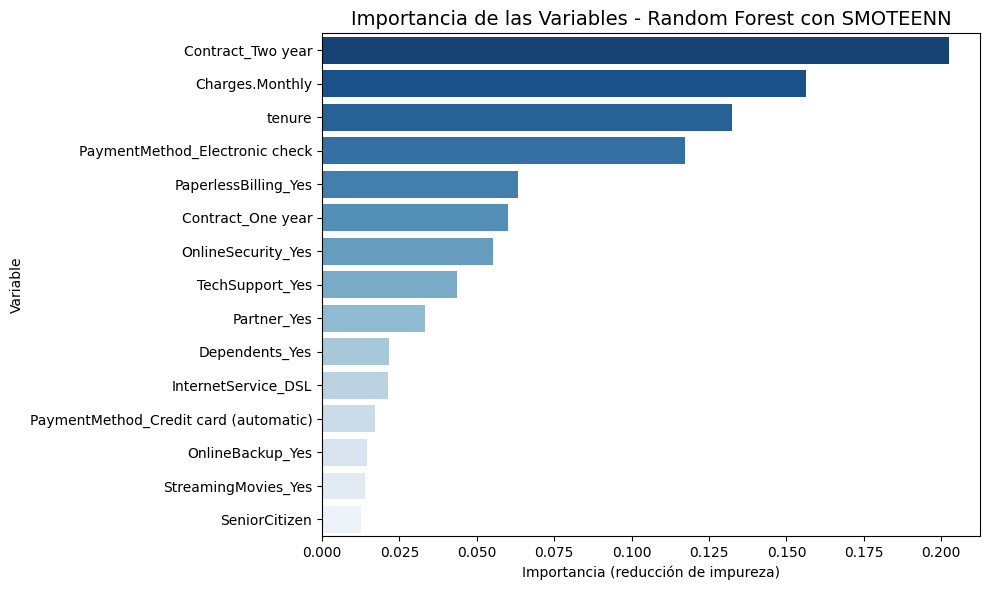

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=df_importancias.head(15), palette="Blues_r")
plt.title("Importancia de las Variables - Random Forest con SMOTEENN", fontsize=14)
plt.xlabel("Importancia (reducción de impureza)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


**Contract_Two year** → es la más importante.

Los clientes con contrato de 2 años tienen mucho menor probabilidad de cancelar, lo que confirma que la permanencia contractual es un factor crítico.

**Charges.Monthly** → la segunda más relevante.

Los cargos mensuales más altos suelen asociarse con mayor probabilidad de churn, probablemente porque el costo influye directamente en la decisión de quedarse o irse.

**tenure** → también muy alto en importancia.

Clientes con poca antigüedad (recién adquiridos) son más propensos a cancelar en comparación con clientes de más tiempo.

**PaymentMethod_Electronic check** → muy influyente.

Quienes pagan con cheque electrónico suelen mostrar mayor churn, lo que refleja un segmento de clientes menos “fidelizados”.

# Usando el modelo con datos nuevos

In [ ]:
pipelines_smoteenn = {
    "DecisionTree": imbpipeline([("smoteenn", SMOTEENN(random_state=42)), ("model", dt)]),
    "RandomForest": imbpipeline([("smoteenn", SMOTEENN(random_state=42)), ("model", rf)])
}

In [ ]:
modelo_rf_smoteenn = pipelines_smoteenn["RandomForest"]

In [ ]:
modelo_rf_smoteenn.fit(X_train, y_train)


nuevo_cliente = pd.DataFrame([{
    "const": 1.0,
    "SeniorCitizen": 0.0,
    "tenure": 12.0,
    "Charges.Monthly": 70.5,
    "InternetService_DSL": 1.0,
    "gender_Male": 1.0,
    "Partner_Yes": 0.0,
    "Dependents_Yes": 0.0,
    "MultipleLines_Yes": 1.0,
    "OnlineSecurity_Yes": 0.0,
    "OnlineBackup_Yes": 1.0,
    "DeviceProtection_Yes": 1.0,
    "TechSupport_Yes": 0.0,
    "StreamingTV_Yes": 1.0,
    "StreamingMovies_Yes": 0.0,
    "Contract_One year": 1.0,
    "Contract_Two year": 0.0,
    "PaperlessBilling_Yes": 1.0,
    "PaymentMethod_Credit card (automatic)": 0.0,
    "PaymentMethod_Electronic check": 1.0,
    "PaymentMethod_Mailed check": 0.0
}])


prediccion = modelo_rf_smoteenn.predict(nuevo_cliente)
probabilidades = modelo_rf_smoteenn.predict_proba(nuevo_cliente)

print("Predicción (0 = No Churn, 1 = Churn):", prediccion[0])
print("Probabilidades [No Churn, Churn]:", probabilidades[0])

Predicción (0 = No Churn, 1 = Churn): 1
Probabilidades [No Churn, Churn]: [0.49790696 0.50209304]


In [ ]:

cliente_churn = pd.DataFrame([{
    "const": 1.0,
    "SeniorCitizen": 1.0,
    "tenure": 2.0,
    "Charges.Monthly": 95.0,
    "InternetService_DSL": 0.0,
    "gender_Male": 1.0,
    "Partner_Yes": 0.0,
    "Dependents_Yes": 0.0,
    "MultipleLines_Yes": 1.0,
    "OnlineSecurity_Yes": 0.0,
    "OnlineBackup_Yes": 0.0,
    "DeviceProtection_Yes": 0.0,
    "TechSupport_Yes": 0.0, # sin servicios extra
    "StreamingTV_Yes": 1.0,
    "StreamingMovies_Yes": 1.0,
    "Contract_One year": 0.0,
    "Contract_Two year": 0.0,
    "PaperlessBilling_Yes": 1.0,  # factura electrónica
    "PaymentMethod_Credit card (automatic)": 0.0,
    "PaymentMethod_Electronic check": 1.0, # método típico de churn
    "PaymentMethod_Mailed check": 0.0
}])

prediccion = modelo_rf_smoteenn.predict(cliente_churn)
probabilidades = modelo_rf_smoteenn.predict_proba(cliente_churn)

print("Predicción (0 = No Churn, 1 = Churn):", prediccion[0])
print("Probabilidades [No Churn, Churn]:", probabilidades[0])


Predicción (0 = No Churn, 1 = Churn): 1
Probabilidades [No Churn, Churn]: [0.01204719 0.98795281]


# **Conclusión**

En conclusión, el análisis muestra que la duración del contrato, los cargos mensuales y la antigüedad del cliente son los principales factores que explican la cancelación. Los clientes con contratos mes a mes, poca antigüedad y cargos elevados presentan mayor riesgo de churn. También se observó que el uso del pago con electronic check incrementa la probabilidad de cancelación, posiblemente por problemas de conveniencia. En contraste, servicios adicionales como soporte técnico y seguridad en línea ayudan a retener clientes.
Con lo anterior, el estudio permite identificar perfiles de riesgo y a la vez propone  estrategias de retención más efectivas, como contratos más flexibles, descuentos en cargos y mejoras en la experiencia de pago y servicio.